The below analysis was conducted by Alexandre Stefanno Menegazzo <br>
https://www.linkedin.com/in/alexandre-menegazzo/

Description:<br>
<br>
The Dataset below contains 9358 averaged results of 5 chemical sensors of a multisensor device (PTXX.SX).<br>
The device was located on the street level, inside a significantly polluted city.<br>
The data was registered from march 2004 to february 2005 (one year).<br>
Absent entries received a -200 value.<br>
The measure of other sensors is also available and some might be redundant.<br>
The key variable to be analysed is the PT08.S1(CO): the CO concentration in the atmosphere.<br>
<br>
Column information:<br>
<br>
Date (DD/MM/YYYY)<br>
Time (HH.MM.SS)<br>
PT08.S1 (CO) – Variable to be predicted<br>
Non Metanic HydroCarbons Concentration (mg/m^3)<br>
4 Benzene Concentration (mg/m^3)<br>
PT08.S2 (NMHC)<br>
NOx Concentration (ppb)<br>
PT08.S3 (NOx)<br>
8 NO2 Concentration (mg/m^3)<br>
PT08.S4 (NO2s)<br>
PT08.S5 (O3)<br>
Temperature (C)<br>
Relative Humidity (%)<br>
AH Absolute Humidity<br>
<br>
Source:<br> DataSet derived from the Air Quality DataSet from Kaggle (https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set)

Importando bibliotecas de análise de dados e carregando banco de dados:

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading csv file on a dataframe

ar = pd.read_csv('qualidade_do_ar.csv',sep=';')
ar.head()

Date      Time  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00         1360       150     11,9           1046   
1  10/03/2004  19.00.00         1292       112      9,4            955   
2  10/03/2004  20.00.00         1402        88        9            939   
3  10/03/2004  21.00.00         1376        80      9,2            948   
4  10/03/2004  22.00.00         1272        51      6,5            836   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0      166          1056      113          1692         1268  13,6  48,9   
1      103          1174       92          1559          972  13,3  47,7   
2      131          1140      114          1555         1074  11,9    54   
3      172          1092      122          1584         1203    11    60   
4      131          1205      116          1490         1110  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,7867  
4  0,7888

Initial analysis and data formatting:

In [3]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           9357 non-null   object
 1   Time           9357 non-null   object
 2   PT08.S1(CO)    9357 non-null   int64 
 3   NMHC(GT)       9357 non-null   int64 
 4   C6H6(GT)       9357 non-null   object
 5   PT08.S2(NMHC)  9357 non-null   int64 
 6   NOx(GT)        9357 non-null   int64 
 7   PT08.S3(NOx)   9357 non-null   int64 
 8   NO2(GT)        9357 non-null   int64 
 9   PT08.S4(NO2)   9357 non-null   int64 
 10  PT08.S5(O3)    9357 non-null   int64 
 11  T              9357 non-null   object
 12  RH             9357 non-null   object
 13  AH             9357 non-null   object
dtypes: int64(8), object(6)
memory usage: 1023.5+ KB


In [3]:
#Formatting some object columns from strings to floats

ar.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    ar[i] = pd.to_numeric(ar[i],errors='coerce') 


In [4]:
#Replacing null data from -200 to NaN for posterior treatment

ar.replace(to_replace=-200,value=np.nan,inplace=True)

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1023.5+ KB


In [5]:
#Formatting Date and Time to datetime type

ar['Date'] = pd.to_datetime(ar['Date'],dayfirst=True) 

ar['Time'] = pd.to_datetime(ar['Time'],format= '%H.%M.%S' ).dt.time

ar.head()

Date      Time  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10  18:00:00       1360.0     150.0      11.9         1046.0   
1 2004-03-10  19:00:00       1292.0     112.0       9.4          955.0   
2 2004-03-10  20:00:00       1402.0      88.0       9.0          939.0   
3 2004-03-10  21:00:00       1376.0      80.0       9.2          948.0   
4 2004-03-10  22:00:00       1272.0      51.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

In [9]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   NMHC(GT)       914 non-null    float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


In [19]:
NMHC_ratio = ar['NMHC(GT)'].isna().sum()/len(ar['NMHC(GT)'])

print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

The NMHC(GT) sensor has 90.23% of missing data.


In [20]:
#Removing NMHC(GT) sensor due to amount of null values

ar.drop('NMHC(GT)', axis=1, inplace=True) 

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   NOx(GT)        7718 non-null   float64       
 6   PT08.S3(NOx)   8991 non-null   float64       
 7   NO2(GT)        7715 non-null   float64       
 8   PT08.S4(NO2)   8991 non-null   float64       
 9   PT08.S5(O3)    8991 non-null   float64       
 10  T              8991 non-null   float64       
 11  RH             8991 non-null   float64       
 12  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 950.4+ KB


Exploratory Analysis and Outlier treatment: 

In [21]:
sns.set_theme(style="whitegrid")

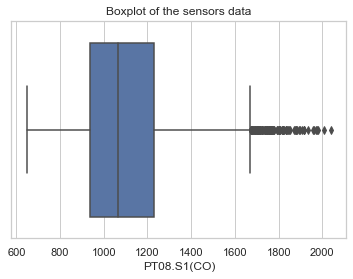

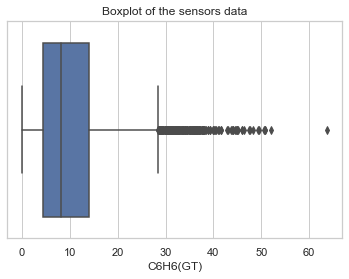

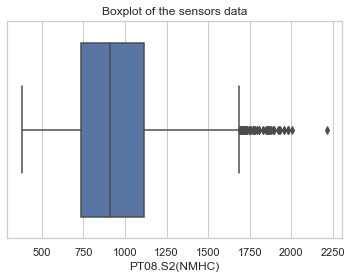

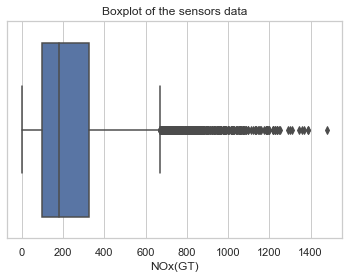

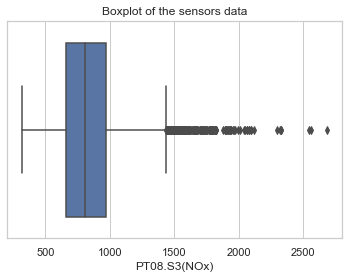

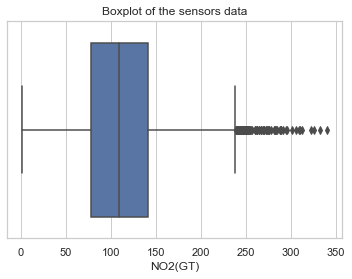

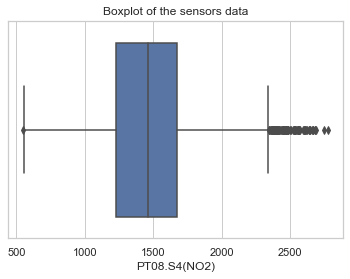

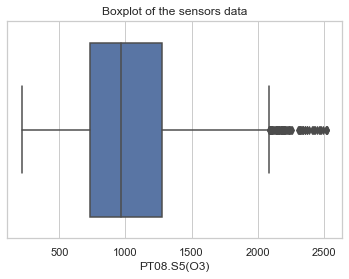

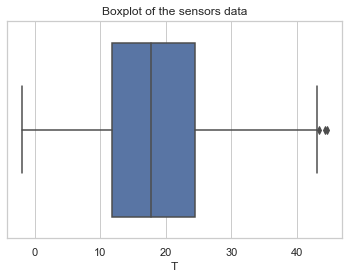

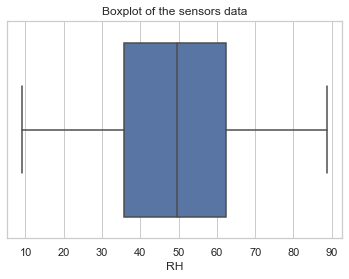

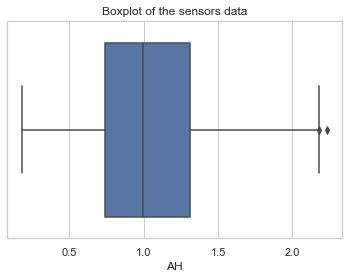

In [26]:
for i in ar.columns[2:13]:
    sns.boxplot(x=ar[i])
    plt.title('Boxplot of the sensors data')
    plt.show()

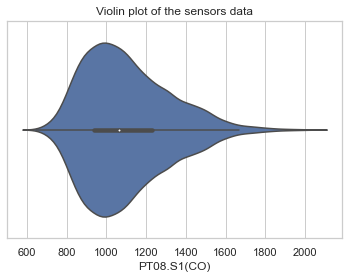

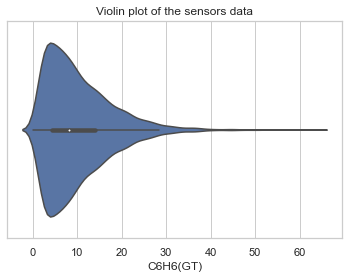

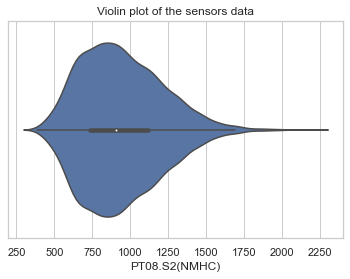

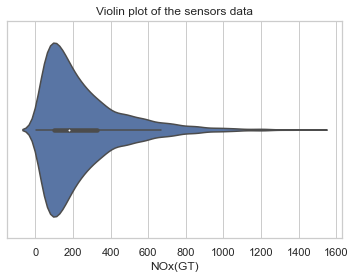

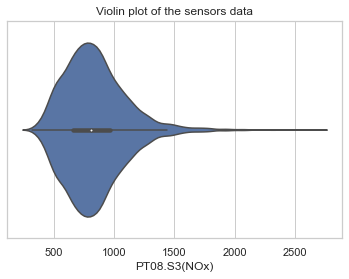

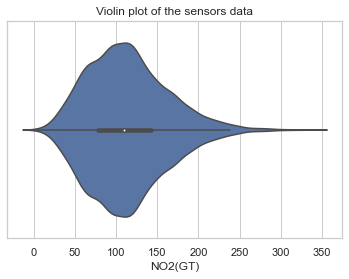

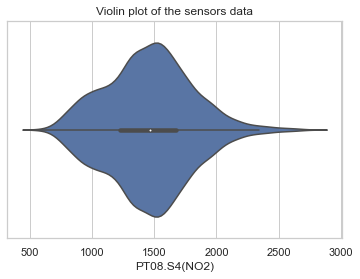

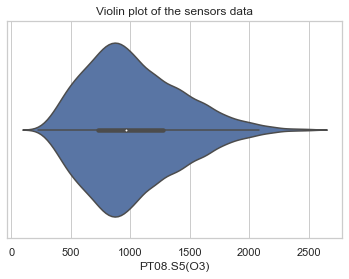

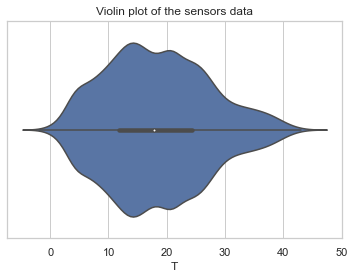

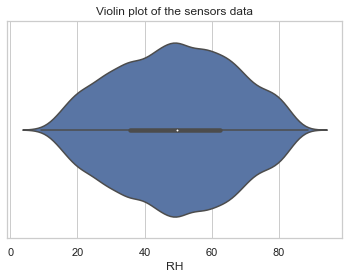

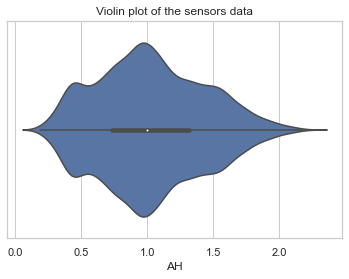

In [32]:
for i in ar.columns[2:13]:
    sns.violinplot(x=ar[i])
    plt.title('Violin plot of the sensors data')
    plt.show()

From the above visualizations it can be seen that most outliers (considering aprox. 3 sigma standard deviation) are located in the upper limit, probably indicating greater occurrences of high chemical concentrations, wich is expected due the location of the sensor.

The data treatment will be made through the elimination of the outliers via the Interquartile Range Method (IQR).<br>
However, as the data distributions are right-skewed and not symmetrical, the scale parameter selected will be higher, with the intention of preserving real occurrences of higher chemical concentration but still discarding possible sensor errors.

An alternative approach that should be tested is preserving all outliers, as they could represent just real occurrences of higher chemical concentration days, and not possible sensor errors.

In [33]:
#Interquartile Range Method (IQR).

Q1 = ar.quantile(0.25) #first 25% of the data
Q3 = ar.quantile(0.75) #first 75% of the data
IQR = Q3 - Q1 #IQR = InterQuartile Range

scale = 2 #For Normal Distributions, scale = 1.5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (ar[ar.columns[2:13]] < lower_lim)
upper_outliers = (ar[ar.columns[2:13]] > upper_lim)

In [34]:
#Checking the resulting outliers calculated by the above method (represented below as non-null values)

ar[ar.columns[2:13]][(lower_outliers | upper_outliers)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    30 non-null     float64
 1   C6H6(GT)       105 non-null    float64
 2   PT08.S2(NMHC)  13 non-null     float64
 3   NOx(GT)        244 non-null    float64
 4   PT08.S3(NOx)   114 non-null    float64
 5   NO2(GT)        32 non-null     float64
 6   PT08.S4(NO2)   20 non-null     float64
 7   PT08.S5(O3)    17 non-null     float64
 8   T              0 non-null      float64
 9   RH             0 non-null      float64
 10  AH             0 non-null      float64
dtypes: float64(11)
memory usage: 804.2 KB


In [35]:
#Created new DataFrame without the outliers

num_cols = list(ar.columns[2:13])
ar_out_IQR = ar[~((ar[num_cols] < (Q1 - 2 * IQR)) |(ar[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]
ar_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8915 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8915 non-null   datetime64[ns]
 1   Time           8915 non-null   object        
 2   PT08.S1(CO)    8595 non-null   float64       
 3   C6H6(GT)       8595 non-null   float64       
 4   PT08.S2(NMHC)  8595 non-null   float64       
 5   NOx(GT)        7313 non-null   float64       
 6   PT08.S3(NOx)   8595 non-null   float64       
 7   NO2(GT)        7310 non-null   float64       
 8   PT08.S4(NO2)   8595 non-null   float64       
 9   PT08.S5(O3)    8595 non-null   float64       
 10  T              8595 non-null   float64       
 11  RH             8595 non-null   float64       
 12  AH             8595 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 975.1+ KB


In [36]:
#Removing NOx(GT) and NO2(GT) sensor data due the ammount of null values if compared to other sensors

pd.options.mode.chained_assignment = None
ar_out_IQR.drop(['NOx(GT)','NO2(GT)'],axis=1, inplace=True)
ar_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8915 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8915 non-null   datetime64[ns]
 1   Time           8915 non-null   object        
 2   PT08.S1(CO)    8595 non-null   float64       
 3   C6H6(GT)       8595 non-null   float64       
 4   PT08.S2(NMHC)  8595 non-null   float64       
 5   PT08.S3(NOx)   8595 non-null   float64       
 6   PT08.S4(NO2)   8595 non-null   float64       
 7   PT08.S5(O3)    8595 non-null   float64       
 8   T              8595 non-null   float64       
 9   RH             8595 non-null   float64       
 10  AH             8595 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 835.8+ KB


Missing Date and Time data:

As regression models will be created later, it was decided to eliminate rows with missing data, in order to prevent data leaking and because the ammount of data lost will be low.

In [37]:
#Eliminating rows with NaN values 

ar_filt = ar_out_IQR.dropna(how='any', axis=0)
ar_filt.reset_index(drop=True,inplace=True)

In [38]:
ar_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8595 entries, 0 to 8594
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8595 non-null   datetime64[ns]
 1   Time           8595 non-null   object        
 2   PT08.S1(CO)    8595 non-null   float64       
 3   C6H6(GT)       8595 non-null   float64       
 4   PT08.S2(NMHC)  8595 non-null   float64       
 5   PT08.S3(NOx)   8595 non-null   float64       
 6   PT08.S4(NO2)   8595 non-null   float64       
 7   PT08.S5(O3)    8595 non-null   float64       
 8   T              8595 non-null   float64       
 9   RH             8595 non-null   float64       
 10  AH             8595 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 738.8+ KB


More Exploratory Analysis:

What are the times of higher concentration of CO on wednesdays?

In [39]:
#Adding a column with the week days 

ar_filt['Week Day'] = ar_filt['Date'].dt.day_name() 

#Rearranging columns

cols = ar_filt.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:11]
ar_filt = ar_filt[cols]
ar_filt.head(10)

Date   Week Day      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10  Wednesday  18:00:00       1360.0      11.9         1046.0   
1 2004-03-10  Wednesday  19:00:00       1292.0       9.4          955.0   
2 2004-03-10  Wednesday  20:00:00       1402.0       9.0          939.0   
3 2004-03-10  Wednesday  21:00:00       1376.0       9.2          948.0   
4 2004-03-10  Wednesday  22:00:00       1272.0       6.5          836.0   
5 2004-03-10  Wednesday  23:00:00       1197.0       4.7          750.0   
6 2004-03-11   Thursday  00:00:00       1185.0       3.6          690.0   
7 2004-03-11   Thursday  01:00:00       1136.0       3.3          672.0   
8 2004-03-11   Thursday  02:00:00       1094.0       2.3          609.0   
9 2004-03-11   Thursday  07:00:00       1144.0       3.2          667.0   

   PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0        1490.0       1110.0  11.2  59.6  0.7888  
5        1337.0        1393.0        949.0  11.2  59.2  0.7848  
6        1462.0        1333.0        733.0  11.3  56.8  0.7603  
7        1453.0        1333.0        730.0  10.7  60.0  0.7702  
8        1579.0        1276.0        620.0  10.7  59.7  0.7648  
9        1490.0        1339.0        730.0  10.2  59.6  0.7417

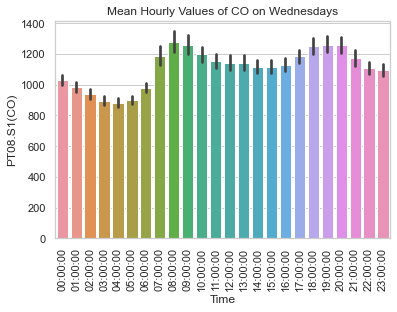

In [40]:
#Creating new dataframe with only wednesday data

ar_wed = ar_filt[ar_filt['Week Day'] == 'Wednesday']

#Plotting the mean hourly value of CO on Wednesdays

sns.barplot(x='Time',y='PT08.S1(CO)', data=ar_wed.sort_values('Time'))
plt.title('Mean Hourly Values of CO on Wednesdays')
plt.xticks(rotation=90)
plt.show()

From the graphics above,it can be concluded that the peak concentration of CO in the city are between 8 AM and 9 AM and between 6 PM and 8 PM, beginnings and endings of office hours, respectively.

Correlation Analysis:

What are the variables most correlated with the variable to be predicted (CO)?

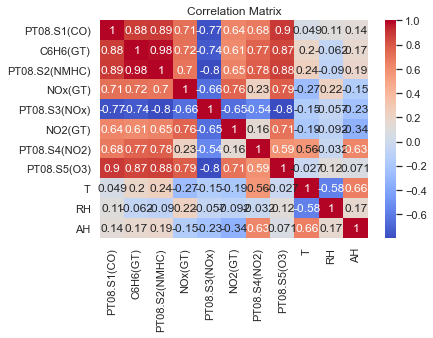

In [41]:
#Plotting correlation matrix

sns.heatmap(ar.corr(),annot=True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

By analyzing the first column of the matrix, it can be concluded that the variables most correlated with the variable to be predicted are the O3, NMHC and C6HC sensors, as it can be supported by the behaviour of the data in the graphics below.

OBS.:<br>
From the distribution plots below it can also be concluded that the C6HC and NMHC sensor are redundants. This hypothesis can be supported by the degree of correlation shown in the Matrix above (0.98).
With some research it can be discovered that indeed the benzene (C6H6) is a Non-Metanic Hydrocarbon (NMHC), being then measured by both the S2 sensor and the benzene sensor.

Therefore, the C6HC(GT) sensor will be eliminated from the analyzed database.

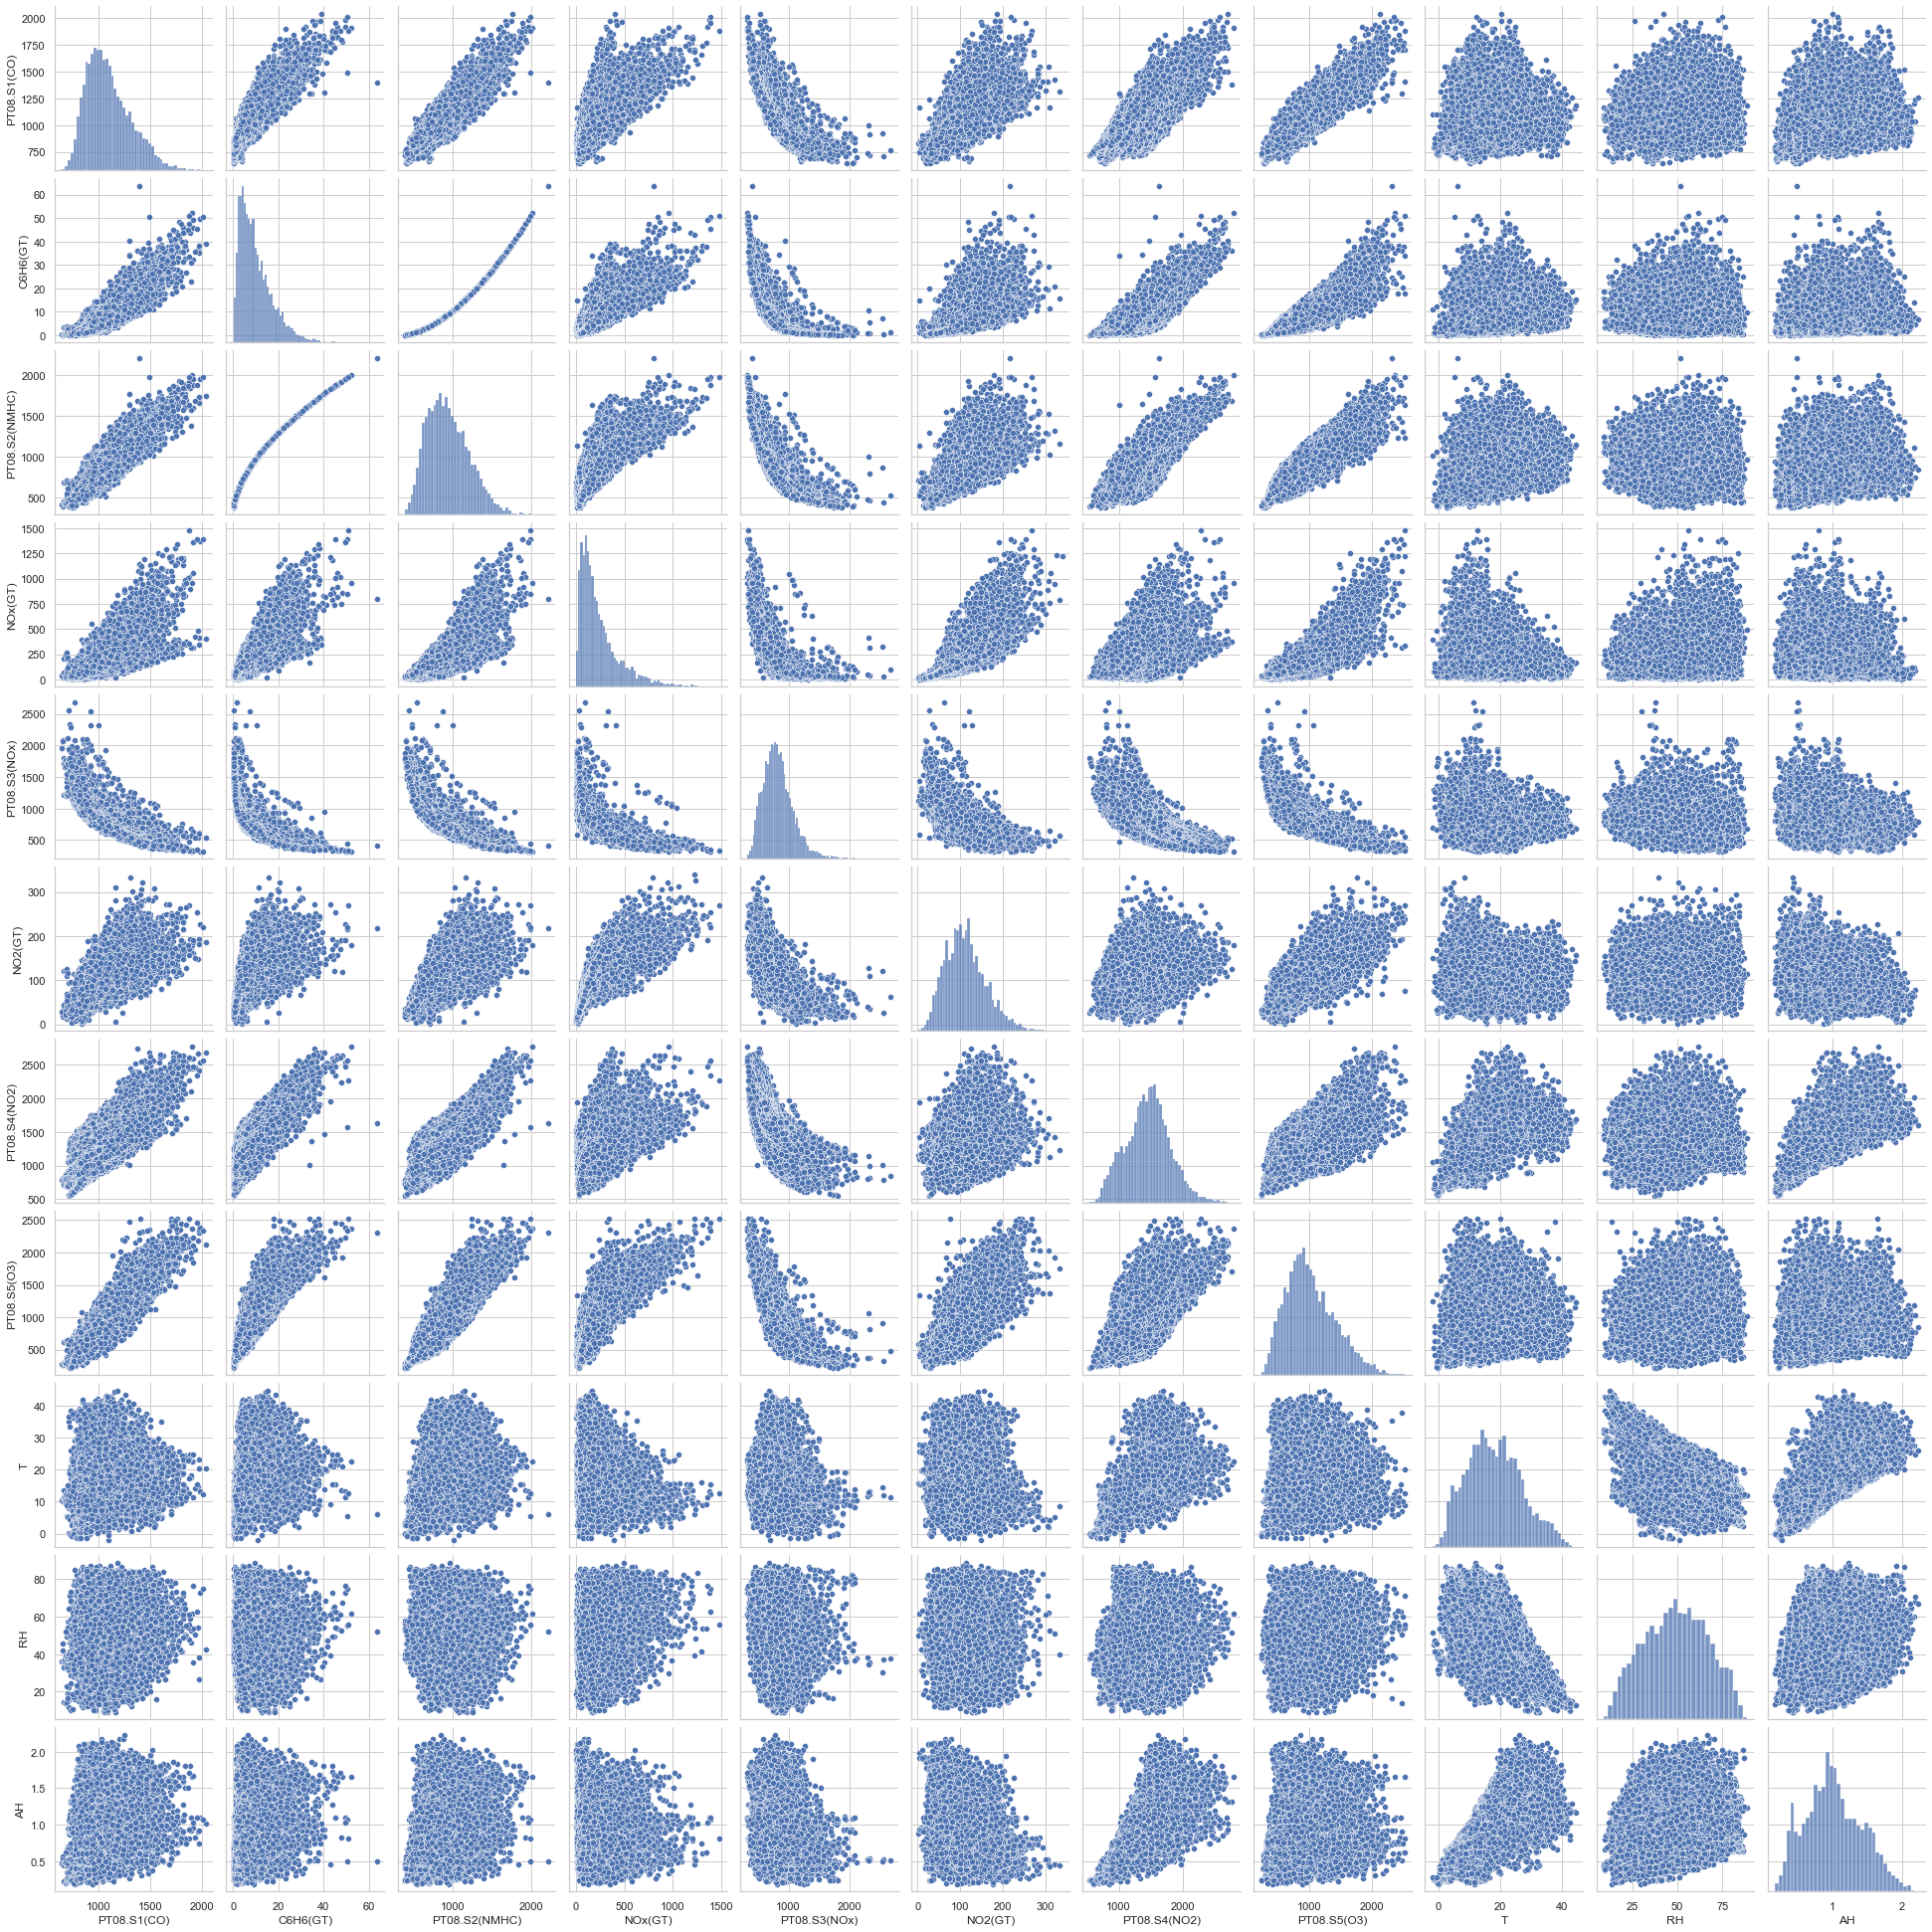

In [29]:
sns.pairplot(ar)
plt.show()

In [42]:
#Eliminating the C6H6(GT) column

ar_filt.drop('C6H6(GT)', axis=1, inplace=True)

Creating a Regression Model of the PT08.S1 sensor:

In [43]:
#Splitting the dataset in 80% for training and 20% for testing

from sklearn.model_selection import train_test_split

Y = ar_filt['PT08.S1(CO)'] #variável de predição
X = ar_filt.drop(['PT08.S1(CO)','Date', 'Time', 'Week Day'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(6876, 7) (1719, 7)


Model 01: Random Forest 

In [44]:
from sklearn.ensemble import RandomForestRegressor

modelo_randomforest = RandomForestRegressor(n_estimators=100)

modelo_randomforest.fit(X_train, Y_train)

RandomForestRegressor()

Evaluating the results with the R² metric:

In [45]:
#Test data evaluation

from sklearn import metrics

pred_randomforest = modelo_randomforest.predict(X_test) #predicted CO concentrations

print('Random Forest Regression Model: R²={:.2f}'.format(metrics.r2_score(Y_test, pred_randomforest)))

Random Forest Regression Model: R²=0.92


Prediction model results: R² = 0,92

Comparing model predictions with the Ground Truth Test Data

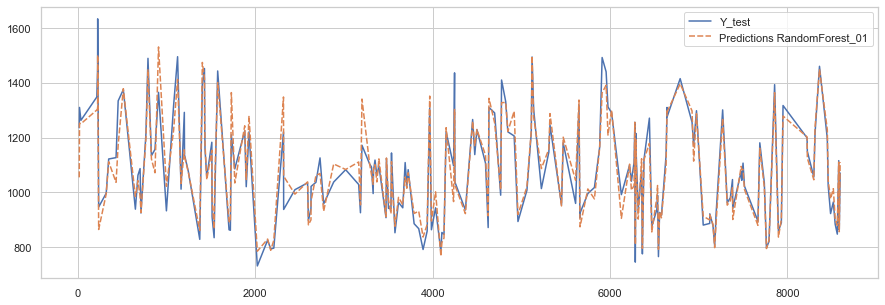

In [46]:
aux = pd.DataFrame()

aux['Y_test'] = Y_test
aux['Predictions RandomForest_01'] = pred_randomforest

plt.figure(figsize=(15,5))
sns.lineplot(data=aux.iloc[:200,:])
plt.show()

It can be seen that the model performs worse in the days with abrupt changes in the CO concentration.

Finally: can the seasons information influnce our model's prediction?

In [47]:
#Extracting season information from Date column:

def season(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

ar_filt['Season'] = ar_filt['Date'].map(season)
ar_filt.head(10)

Date   Week Day      Time  PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10  Wednesday  18:00:00       1360.0         1046.0        1056.0   
1 2004-03-10  Wednesday  19:00:00       1292.0          955.0        1174.0   
2 2004-03-10  Wednesday  20:00:00       1402.0          939.0        1140.0   
3 2004-03-10  Wednesday  21:00:00       1376.0          948.0        1092.0   
4 2004-03-10  Wednesday  22:00:00       1272.0          836.0        1205.0   
5 2004-03-10  Wednesday  23:00:00       1197.0          750.0        1337.0   
6 2004-03-11   Thursday  00:00:00       1185.0          690.0        1462.0   
7 2004-03-11   Thursday  01:00:00       1136.0          672.0        1453.0   
8 2004-03-11   Thursday  02:00:00       1094.0          609.0        1579.0   
9 2004-03-11   Thursday  07:00:00       1144.0          667.0        1490.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Season  
0        1692.0       1268.0  13.6  48.9  0.7578  winter  
1        1559.0        972.0  13.3  47.7  0.7255  winter  
2        1555.0       1074.0  11.9  54.0  0.7502  winter  
3        1584.0       1203.0  11.0  60.0  0.7867  winter  
4        1490.0       1110.0  11.2  59.6  0.7888  winter  
5        1393.0        949.0  11.2  59.2  0.7848  winter  
6        1333.0        733.0  11.3  56.8  0.7603  winter  
7        1333.0        730.0  10.7  60.0  0.7702  winter  
8        1276.0        620.0  10.7  59.7  0.7648  winter  
9        1339.0        730.0  10.2  59.6  0.7417  winter

Visualyzing the data distribution by season of the year:

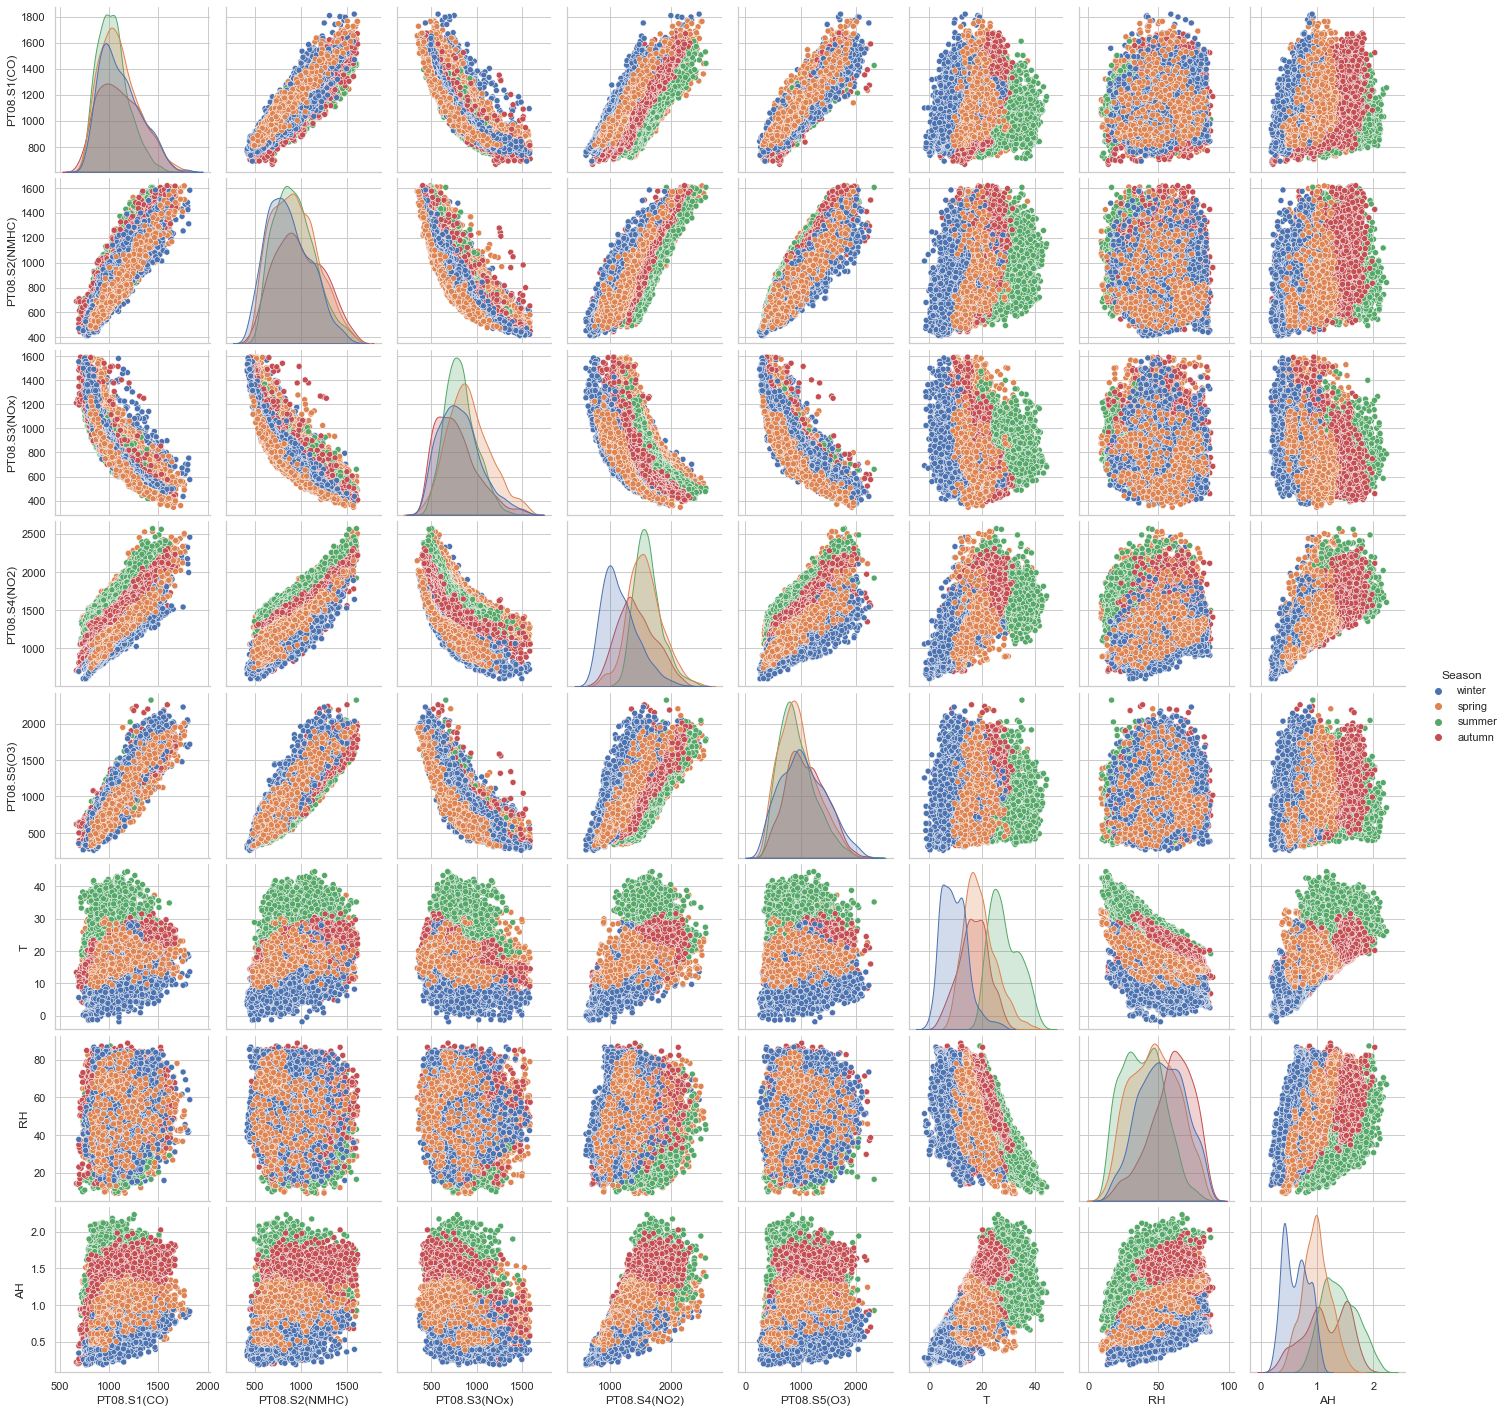

In [37]:
sns.pairplot(ar_filt, hue='Season')
plt.show()

The graphics above show a stratification of the data acquired by the sensors in different seasons, revealing correlations between higher concentrations of chemicals and higher temperatures.

This new information can be used as an additional feature in the model to increase model performance: 

In [49]:
#Creating categorical features from Season column and splitting new dataframe

Y_2 = ar_filt['PT08.S1(CO)']
X_2 = ar_filt.drop(['PT08.S1(CO)','Date', 'Time', 'Week Day'], axis=1)
X_2 = pd.get_dummies(data=X_2)

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=0.2, random_state=42)
X_2.head()

PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0         1046.0        1056.0        1692.0       1268.0  13.6  48.9  0.7578   
1          955.0        1174.0        1559.0        972.0  13.3  47.7  0.7255   
2          939.0        1140.0        1555.0       1074.0  11.9  54.0  0.7502   
3          948.0        1092.0        1584.0       1203.0  11.0  60.0  0.7867   
4          836.0        1205.0        1490.0       1110.0  11.2  59.6  0.7888   

   Season_autumn  Season_spring  Season_summer  Season_winter  
0              0              0              0              1  
1              0              0              0              1  
2              0              0              0              1  
3              0              0              0              1  
4              0              0              0              1

New Random Forests Model considering the Seasons

In [50]:
modelo_randomforest_2 = RandomForestRegressor()

modelo_randomforest_2.fit(X_2_train, Y_2_train)

RandomForestRegressor()

In [51]:
pred_randomforest_2 = modelo_randomforest_2.predict(X_2_test)

print('Regression Model without Seasons: R²={:.2f}'.format(metrics.r2_score(Y_test, pred_randomforest)))
print('Regression Model with Seasons: R²={:.2f}'.format(metrics.r2_score(Y_2_test, pred_randomforest_2)))

Regression Model without Seasons: R²=0.92
Regression Model with Seasons: R²=0.94


R² coefficient increased by 2%.

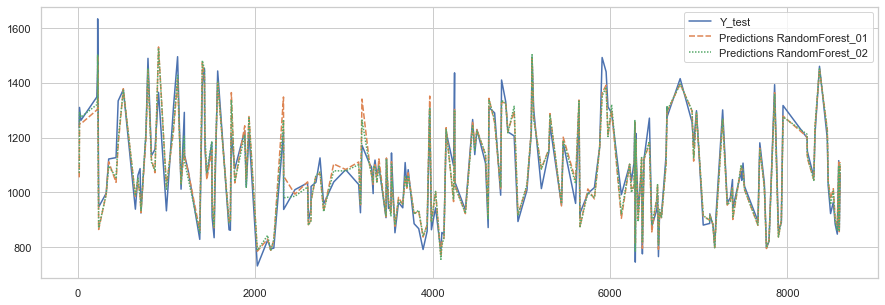

In [52]:
aux['Predictions RandomForest_02'] = pred_randomforest_2

plt.figure(figsize=(15,5))
sns.lineplot(data=aux.iloc[:200,:])
plt.show()

It can be seen that the new model used the new information to react slightly better to abrupt changes in the predicted variable.